# Monte Carlo Simulation for FE
## IEOR 4703

### Visualization of the Acceptance-Rejection algorithm

We simulate normal samples using exponential proposals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_vec = np.arange(0, 5.01, 0.01)
f1 = np.exp(-x_vec**2/2)/np.sqrt(2*np.pi)
f = np.sqrt(2/np.pi)*np.exp(-x_vec**2/2)

g = np.exp(-x_vec)

factor = 10.

c = factor*np.sqrt(2/np.pi)*np.exp(0.5)
g1 = c*g

In [3]:
np.random.seed(123)

num_trials = 300000
x_array = np.zeros(num_trials)

num_samples = 50000
count = 0
i = 0

indicators = np.zeros(num_trials, dtype=int)
u_array = np.zeros(num_trials)

while True:
    x = -np.log(np.random.rand()) # exponential
    u = np.random.rand()
    fx = np.sqrt(2/np.pi)*np.exp(-x**2/2)
    gx = np.exp(-x)
    ratio = fx/(c*gx)

    if u <= ratio:
        # accept
        count += 1
        indicators[i] = 1
        # reflection
        if np.random.rand() > 0.5:
            x = -x
    x_array[i] = x
    u_array[i] = u
    i += 1

    if count == num_samples or i == num_trials:
        break

indicators = indicators[:i]
x_array = x_array[:i]
u_array = u_array[:i]
z = np.arange(-5, 5.01, 0.01)
fz = np.exp(-z**2/2)/np.sqrt(2*np.pi)

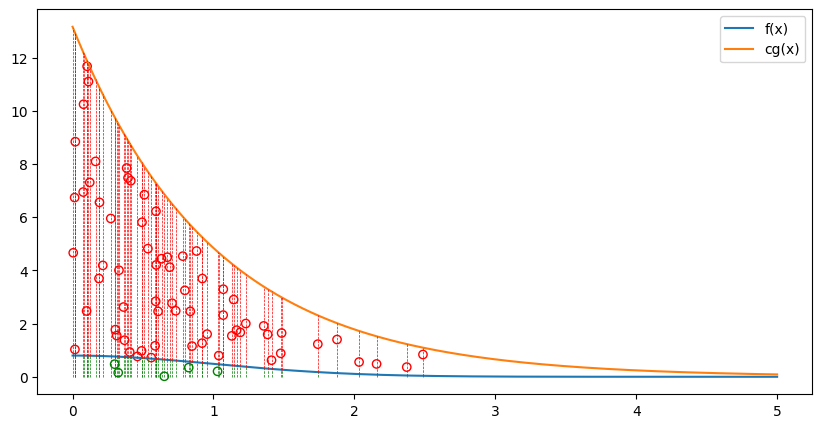

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x_vec, f)
plt.plot(x_vec, g1)
plt.legend(['f(x)', 'cg(x)'])
count = 0
num_accepted_plot = 5
for i in range(len(indicators)):
    x = abs(x_array[i])
    fx = np.sqrt(2/np.pi)*np.exp(-x**2/2)
    gx = np.exp(-x)
    y = u_array[i]*c*gx
    plt.plot([x,x], [0, fx], 'g--', linewidth=0.5)
    plt.plot([x,x], [fx, c*gx], 'r--', linewidth=0.5)
    if indicators[i]:
        plt.scatter(x, y, facecolors='none', edgecolors='g')
        count += 1
    else:
        plt.scatter(x, y, facecolors='none', edgecolors='r')
    if count == num_accepted_plot:
        break

plt.show()

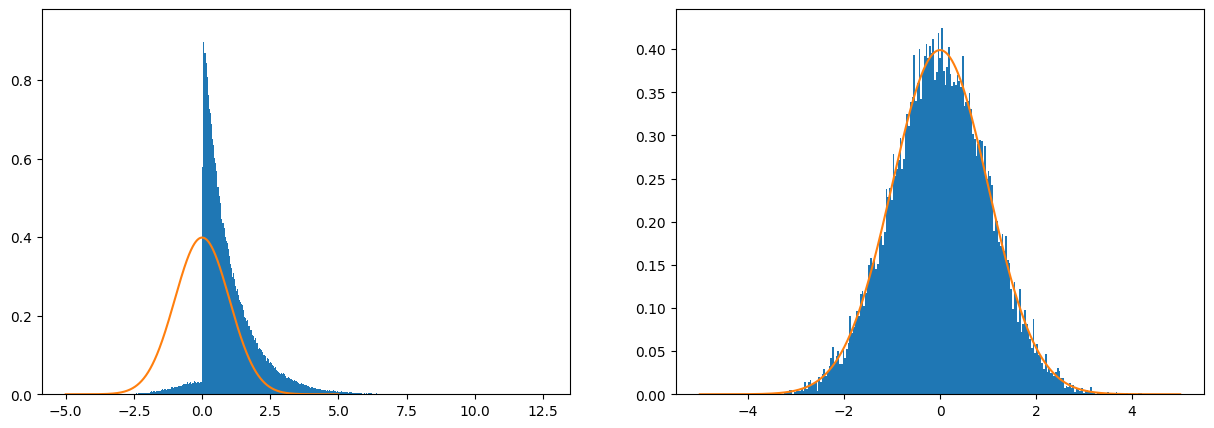

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(x_array, density=True, bins=int(np.sqrt(len(x_array))))
plt.plot(z, fz)
plt.subplot(1, 2, 2)
plt.hist(x_array[indicators==True], density=True, bins=int(np.sqrt(num_samples)))
plt.plot(z, fz)
plt.show()